### Time Series Activity 1
#### JFC Dataset

Mary Rose N. Redilla     BSCS 3A

In [1]:
# the record is from Feb 1 to Jun 30 2016

import pandas as pd

df = pd.read_csv("jfc_nodates.csv")
df.head()

,Open,High,Low,Close,Volume
0,235.8,249.4,235.8,242.0,"2,444,310"
1,235.0,236.6,234.6,235.8,"1,153,270"
2,234.0,235.2,233.6,235.0,"611,860"
3,231.2,235.2,231.2,233.2,"578,730"
4,235.8,235.8,231.8,235.0,"752,550"


In [2]:
df = df.iloc[::-1]
df

,Open,High,Low,Close,Volume
103,207.0,209.8,205.6,207.8,"1,911,460"
102,207.8,208.0,206.8,207.0,"795,570"
101,204.0,206.8,201.0,206.4,"1,085,110"
100,206.4,207.8,205.0,207.0,"977,580"
99,208.0,217.4,207.2,214.6,"1,519,180"
...,...,...,...,...,...
4,235.8,235.8,231.8,235.0,"752,550"
3,231.2,235.2,231.2,233.2,"578,730"
2,234.0,235.2,233.6,235.0,"611,860"
1,235.0,236.6,234.6,235.8,"1,153,270"


In [3]:
# sets the range starting from Feb 1, 2016 to see the number of days that don't have trades

rng = pd.date_range(start='2016-02-01', periods=104, freq='B')
df.index = rng
rng

DatetimeIndex(['2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
               '2016-02-05', '2016-02-08', '2016-02-09', '2016-02-10',
               '2016-02-11', '2016-02-12',
               ...
               '2016-06-10', '2016-06-13', '2016-06-14', '2016-06-15',
               '2016-06-16', '2016-06-17', '2016-06-20', '2016-06-21',
               '2016-06-22', '2016-06-23'],
              dtype='datetime64[ns]', length=104, freq='B')

In [4]:
# localizing the dataset

df.index = df.index.tz_localize(tz="Asia/Manila")
df.index

DatetimeIndex(['2016-02-01 00:00:00+08:00', '2016-02-02 00:00:00+08:00',
               '2016-02-03 00:00:00+08:00', '2016-02-04 00:00:00+08:00',
               '2016-02-05 00:00:00+08:00', '2016-02-08 00:00:00+08:00',
               '2016-02-09 00:00:00+08:00', '2016-02-10 00:00:00+08:00',
               '2016-02-11 00:00:00+08:00', '2016-02-12 00:00:00+08:00',
               ...
               '2016-06-10 00:00:00+08:00', '2016-06-13 00:00:00+08:00',
               '2016-06-14 00:00:00+08:00', '2016-06-15 00:00:00+08:00',
               '2016-06-16 00:00:00+08:00', '2016-06-17 00:00:00+08:00',
               '2016-06-20 00:00:00+08:00', '2016-06-21 00:00:00+08:00',
               '2016-06-22 00:00:00+08:00', '2016-06-23 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Manila]', length=104, freq=None)

In [5]:
# custom business day calendar excluding PH holidays

from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday

class myCustomCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday("Lunar New Year's Day", month=2, day=18),
        Holiday("People Power Anniversary", month=2, day=25),
        Holiday("Maundy Thursday", month=3, day=24),
        Holiday("Good Friday", month=3, day=25),
        Holiday("National Election", month=5, day=9)
    ]
    
ph_holidays = CustomBusinessDay(calendar=myCustomCalendar())

rng = pd.date_range('2016-02-01', '2016-06-30', freq=ph_holidays)
df.index = rng
df.index

DatetimeIndex(['2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
               '2016-02-05', '2016-02-08', '2016-02-09', '2016-02-10',
               '2016-02-11', '2016-02-12',
               ...
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', length=104, freq='C')

In [6]:
df.tail()

,Open,High,Low,Close,Volume
2016-06-24,235.8,235.8,231.8,235.0,"752,550"
2016-06-27,231.2,235.2,231.2,233.2,"578,730"
2016-06-28,234.0,235.2,233.6,235.0,"611,860"
2016-06-29,235.0,236.6,234.6,235.8,"1,153,270"
2016-06-30,235.8,249.4,235.8,242.0,"2,444,310"


<AxesSubplot:>

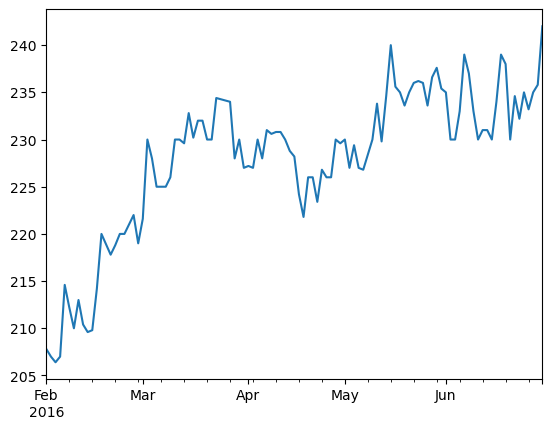

In [7]:
df['Close'].plot.line()

Analysis:

Based on the graph, the stock market of JFC has experienced overall growth from February 1 to June 30, 2016.